In [2]:
import pandas as pd

In [3]:
nsmc_train_df = pd.read_csv('ratings_train.txt', encoding='utf-8', sep= '\t')

In [4]:
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [6]:
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]

In [7]:
nsmc_train_df['label'].value_counts()

label
0    75170
1    74825
Name: count, dtype: int64

In [8]:
import re

In [9]:
nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x:re.sub(r'[^ ㄱ-ㅣ가-힣]+',"",x))

In [10]:
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [11]:
nsmc_test_df = pd.read_csv('ratings_test.txt', encoding='utf-8', sep= '\t')

In [12]:
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [13]:
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]

In [14]:
nsmc_test_df['label'].value_counts()

label
1    25171
0    24826
Name: count, dtype: int64

In [15]:
nsmc_test_df['document'] = nsmc_test_df['document'].apply(lambda x:re.sub(r'[^ ㄱ-ㅣ가-힣]+',"",x))

In [16]:
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


## 분석모델 구축

### 특성백터화 작업

In [17]:
from konlpy.tag import Okt

In [18]:
okt = Okt()

In [19]:
def okt_tokenizer(text):
  token = okt.morphs(text)
  return token

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
## range 는 단어 1 ~2개 를 말하고 토큰출현 빈도는 최소 3번 최대 90%미만 인것만 사용 한다고 정의해줌

In [22]:
tfidf.fit(nsmc_test_df['document'])

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2),
                tokenizer=<function okt_tokenizer at 0x000001C2E4C37A60>)

In [23]:
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])
### 데이터 전처리 끝. 

In [24]:
nsmc_train_tfidf

<149995x44111 sparse matrix of type '<class 'numpy.float64'>'
	with 2346338 stored elements in Compressed Sparse Row format>

### 감성분류 모델 구축 
##### 로지스틱 회귀 모델을 이용하여 긍정과 부정의 감성 이진 분류 모델 구축

In [25]:
from sklearn.linear_model import LogisticRegression
SA_lr = LogisticRegression(random_state=0)

In [26]:
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [27]:
from sklearn.model_selection import GridSearchCV
params = {'C' : [1,3,3,5,4,4.5,5]}
SA_lr_grid_cc = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [28]:
SA_lr_grid_cc.fit(nsmc_train_tfidf, nsmc_train_df['label'])

Fitting 3 folds for each of 7 candidates, totalling 21 fits


C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kimtp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3, 5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [29]:
print(SA_lr_grid_cc.best_params_, round(SA_lr_grid_cc.best_score_, 4))

{'C': 3} 0.8495


In [30]:
SA_lr_best = SA_lr_grid_cc.best_estimator_

In [31]:
SA_lr_best

LogisticRegression(C=3, random_state=0)

### 분석 모델 평가
##### 평가용 데이터의 피쳐 백터화

In [33]:
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

In [34]:
test_predict = SA_lr_best.predict(nsmc_test_tfidf)

In [35]:
test_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print('감성 분석 정확도 : ', round(accuracy_score(nsmc_test_df['label'], test_predict),3))

감성 분석 정확도 :  0.855


In [38]:
st = input("감정을 입력 : ")

감정을 입력 : 오늘은 좋은 날이 될것 같은 예감 ^^


In [39]:
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['오늘은', '좋은', '날이', '될것', '같은', '예감']
['오늘은 좋은 날이 될것 같은 예감']


In [40]:
st_tfidf = tfidf.transform(st)
st_predict = SA_lr_best.predict(st_tfidf)

In [41]:
if st_predict == 0:
  print("입력하신 %s 는 부정 감정입니다" % st)
else :
  print("입력하신 %s 는 긍정 감정입니다" % st)

입력하신 ['오늘은 좋은 날이 될것 같은 예감'] 는 긍정 감정입니다


In [42]:
def emotion():
  st = input("감정을 입력 : ")
  st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
  print(st)
  st = [" ".join(st)]
  print(st)
  st_tfidf = tfidf.transform(st)
  st_predict = SA_lr_best.predict(st_tfidf)
  if st_predict == 0:
    print("입력하신 %s 는 부정 감정입니다" % st)
  else :
    print("입력하신 %s 는 긍정 감정입니다" % st)

In [43]:
emotion()

감정을 입력 : 오늘은 기분 좋은 날이 되기 위해 잘 해야지
['오늘은', '기분', '좋은', '날이', '되기', '위해', '잘', '해야지']
['오늘은 기분 좋은 날이 되기 위해 잘 해야지']
입력하신 ['오늘은 기분 좋은 날이 되기 위해 잘 해야지'] 는 긍정 감정입니다


# 감성 분석 + 바 차트

##### 데이터 준비및 탐색

In [44]:
import json

In [45]:
file_name = '코로나_naver_news'

In [46]:
with open(file_name+'.json', encoding = 'utf-8') as j_f:
  data = json.load(j_f)

In [47]:
print(data)

[{'cnt': 1, 'description': '<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ', 'pDate': '2020-06-04 14:12:00', 'title': "결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;"}, {'cnt': 2, 'description': '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ', 'pDate': '2020-06-04 14:12:00', 'title': '창녕군, ‘창녕형’비대면 선별진료소 운영'}, {'cnt': 3, 'description': "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ", 'pDate': '2020-06-04 14:12:00', 'title': "DK모바일, 메인 홍보 모델로 AOA '설현' 선정"}, {'cnt': 4, 'description': '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ', 'pDate': '2020-06-04 14:12:00', 'title': '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]'}, {'cnt': 5, 

In [48]:
data_title = []
data_description = []
for item in data:
  data_title.append(item['title'])
  data_description.append(item['description'])

In [49]:
data_title

["결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;",
 '창녕군, ‘창녕형’비대면 선별진료소 운영',
 "DK모바일, 메인 홍보 모델로 AOA '설현' 선정",
 '김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]',
 '이재갑 장관, 고용안정지원금 서울센터 방문',
 "'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다",
 "31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불",
 '국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’',
 '경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구',
 '이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야&quot;',
 '<b>코로나</b>19로 인해 변한 원광한의대 경혈학 실습 풍경',
 '경산시 농산물 드라이브 스루 특별할인 판매행사 개최',
 '당신이 아는 미술, 시장이 아는 미술 ④ 한국 현대 미술 시장을 이끄는 작가',
 '제25회 부산국제영화제 공식 상영작 모집 [공식]',
 '수도권 <b>코로나</b>19 확진자 산발적으로 늘어…하루 새 47명 증가',
 '동작구, 전통시장 무료 배송서비스 사업 실시',
 '서울 건강용품 세미나서 무더기 확진…199명 검사',
 'BBQ, 상반기 신입 및 경력직 공채 시행',
 '중국 굴착기 판매량 상승에도...두산인프라코어 긴장하는 이유는',
 '미소짓는 의료진',
 "'포스트 <b>코로나</b>' 대비…M&amp;A·투자 잰걸음 나서는 게임사",
 "휴넷, 리더십 게임러닝 프로그램 '아르고' 출시",
 '광주 서구 양동, 민·관 협력으로 주거환경 개선',
 '손흥민의 고백, “3주간의 군사훈련, 힘들지만 즐겼다”',
 '靑 “카타르 LNG선 수주, 문 대통령 경제외교 결실”',
 '[유통÷나누기 세상＋더하기] 세븐일레븐, 유치원 통학차량에 공기청정기 설치...',
 '김포 혁신교육지구 사업, 특수교육대상자를 위한 교육과정 지원'

In [50]:
data_description

['<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 줄어들면서 정부의 재정 마련에 대한 우려가 컸다. 이 때문에 한국개발원(KDI) 등 국책연구기관들은 증세를 화두로 꺼내들었지만, 정부 여당은 증세에... ',
 '▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다.©(사진제공=창녕군청) <b>코로나</b> 장기화 대비 비대면 선별진료 도입 경남 창녕군은 지난 2월 28일 도내 최초로 <b>코로나</b>19 선별진료소... ',
 "한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’ PANDEMIC(세계적 유행)에서 다큐멘터리 내레이션에 처음 도전해 호평을 받았으며, tvN의 새 드라마 '낮과 밤' 출연을 검토중이다. 게임과 이벤트에 대한... ",
 '변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19)의 위기를 마주하고 있다. 언제 끝이날 지 또 앞으로 어떠한 미래가 펼치질 지 모른다. 국가가 나서서 국민의 어려움을 해결해 줘야 한다. 저희... ',
 '\xa0이재갑\xa0고용노동부\xa0장관은\xa06월3일(수)\xa011시에\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0서울\xa01센터(서울\xa0중구)를\xa0방문했다. 이번\xa0현장\xa0방문은\xa0<b>코로나</b>19\xa0긴급\xa0고용안정지원금\xa0신청을\xa0시작한\xa0지\xa0이틀\xa0만에\xa0약\xa012만건... ',
 "하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로 오프라인 행사를 진행하지 않게 되었고, 공식 채널(Canal +)을 통해 ‘Cannes Official Selection 2020’ 명칭의 초청작 리스트를 공개했다. 한편 '반도'는 7월 국내외... ",
 '경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔고 지난 홍콩 국가보안법

In [51]:
data_df = pd.DataFrame({'title' : data_title, 'description' : data_description})

In [52]:
data_df.head()

,title,description
0,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ..."
1,"창녕군, ‘창녕형’비대면 선별진료소 운영",▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정","한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’..."
3,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰],변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
4,"이재갑 장관, 고용안정지원금 서울센터 방문",이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...


In [53]:
description = data_df['description']

In [54]:
description

0      <b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...
1      ▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...
2      한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...
3      변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...
4       이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...
                             ...                        
795    글로벌기업 현대.기아차가 <b>코로나</b>19의 여파로 해외시장에서 고전을 면치 ...
796    한국중부발전 본사 전경 한국중부발전(사장 박형구)은 <b>코로나</b>19 장기화로...
797    박종환 한국자유총연맹 총재 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b...
798    이상훈 회장은 “<b>코로나</b>19 신규 확진자가 수도권에서 발생했고 정부는 수...
799    제56회 대종상영화제 참석한 문가영제56회 대종상영화제 참석한 문가영 <b>코로나<...
Name: description, Length: 800, dtype: object

In [55]:
description_noun_tk2 = []
for d in description:
  description_noun_tk2.append(okt.nouns(d))

In [56]:
description_noun_tk2

[['코로나',
  '발',
  '경제',
  '위기',
  '대응',
  '위해',
  '돈',
  '곳',
  '국세',
  '수입',
  '정부',
  '재정',
  '마련',
  '대한',
  '우려',
  '이',
  '때문',
  '한국',
  '개발',
  '등',
  '국책',
  '연구기관',
  '증세',
  '화두',
  '정부',
  '여당',
  '증세'],
 ['지난',
  '창녕군',
  '보건소',
  '앞',
  '설치',
  '선',
  '진료',
  '소',
  '검사',
  '체온',
  '측정',
  '사진',
  '제공',
  '창녕군',
  '청',
  '코로나',
  '장기',
  '대비',
  '비대',
  '선',
  '진료',
  '도입',
  '경남',
  '창녕군',
  '지난',
  '도내',
  '최초',
  '코로나',
  '선',
  '진료',
  '소'],
 ['한편',
  '설현',
  '은',
  '최근',
  '코로나',
  '바이러스',
  '시리즈',
  '세계',
  '유행',
  '다큐멘터리',
  '내레이션',
  '처음',
  '도전',
  '호평',
  '의',
  '새',
  '드라마',
  '낮',
  '밤',
  '출연',
  '검토',
  '게임',
  '이벤트',
  '대한'],
 ['변화',
  '핵심',
  '중',
  '우리',
  '사회',
  '신종',
  '코로나',
  '바이러스',
  '감염증',
  '코로나',
  '의',
  '위기',
  '마주',
  '언제',
  '끝',
  '날',
  '또',
  '앞',
  '미래',
  '국가',
  '국민',
  '어려움',
  '해결',
  '저희'],
 ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀', '약'],
 ['올해',
  '신종',
  '코로나',
  '바이러스',
  '감염증',
  '코로나',
  '여파',
  '오프라인',

In [57]:
description_noun_tk_2 = []
for d in description_noun_tk2:
  item = [i for i in d if len(i) > 1]
  description_noun_tk_2.append(item)

In [58]:
description_noun_tk_2

[['코로나',
  '경제',
  '위기',
  '대응',
  '위해',
  '국세',
  '수입',
  '정부',
  '재정',
  '마련',
  '대한',
  '우려',
  '때문',
  '한국',
  '개발',
  '국책',
  '연구기관',
  '증세',
  '화두',
  '정부',
  '여당',
  '증세'],
 ['지난',
  '창녕군',
  '보건소',
  '설치',
  '진료',
  '검사',
  '체온',
  '측정',
  '사진',
  '제공',
  '창녕군',
  '코로나',
  '장기',
  '대비',
  '비대',
  '진료',
  '도입',
  '경남',
  '창녕군',
  '지난',
  '도내',
  '최초',
  '코로나',
  '진료'],
 ['한편',
  '설현',
  '최근',
  '코로나',
  '바이러스',
  '시리즈',
  '세계',
  '유행',
  '다큐멘터리',
  '내레이션',
  '처음',
  '도전',
  '호평',
  '드라마',
  '출연',
  '검토',
  '게임',
  '이벤트',
  '대한'],
 ['변화',
  '핵심',
  '우리',
  '사회',
  '신종',
  '코로나',
  '바이러스',
  '감염증',
  '코로나',
  '위기',
  '마주',
  '언제',
  '미래',
  '국가',
  '국민',
  '어려움',
  '해결',
  '저희'],
 ['이번', '현장', '방문', '코로나', '긴급', '고용', '안정', '원금', '신청', '시작', '이틀'],
 ['올해',
  '신종',
  '코로나',
  '바이러스',
  '감염증',
  '코로나',
  '여파',
  '오프라인',
  '행사',
  '진행',
  '공식',
  '채널',
  '통해',
  '명칭',
  '초청',
  '리스트',
  '공개',
  '한편',
  '반도',
  '국내외'],
 ['경찰',
  '코로나',
  '감염',
  '우려',
  '이상',
  '집회',
  '봉쇄',
  '지난',
 

In [59]:
import gensim
import gensim.corpora as corpora

In [60]:
dictionary = corpora.Dictionary(description_noun_tk_2)

In [61]:
dictionary

In [62]:
print(dictionary[10])

연구기관


In [63]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk_2]

In [64]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1)], [(17, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 3), (33, 3), (34, 1), (35, 1), (36, 1)], [(5, 1), (17, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(12, 1), (17, 2), (43, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(17, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(17, 2), (43, 1), (52, 1), (54, 1), (61, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)], [(11, 1), (17, 2), (31, 1), (49, 1), (86, 1), (92, 1), (93, 2)

In [68]:
k = 4
#토픽 개수 설정

In [69]:
from ast import iter_fields
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics = k, id2word=dictionary,
                                                    passes=1, workers = 10)

In [70]:
import tensorflow as tf
from tensorflow import keras

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [73]:
train_scaled = train_input / 255.0

In [74]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state = 42)

In [75]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [76]:
model = model_fn()

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [79]:
history

In [80]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


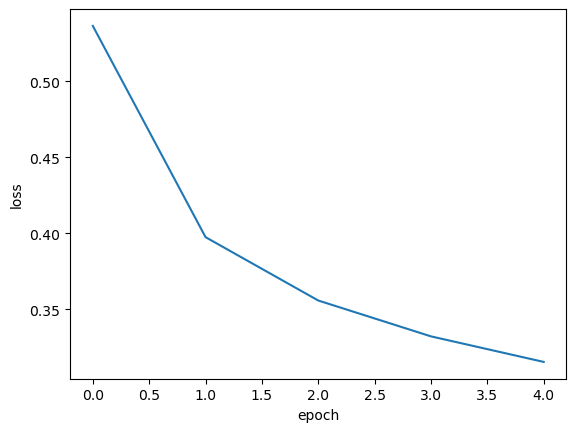

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

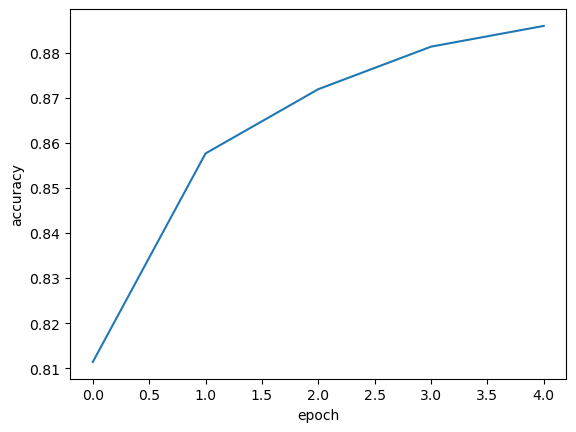

In [82]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

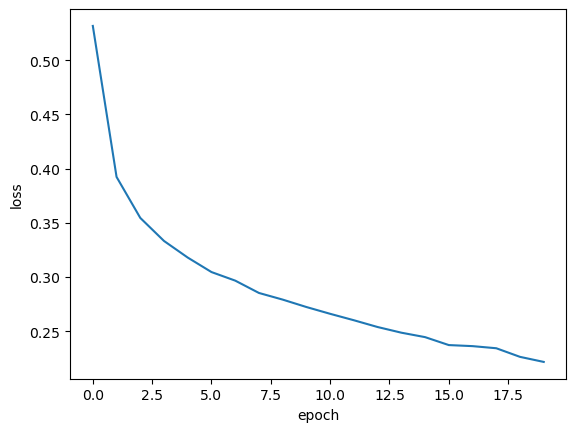

In [83]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [84]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [85]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


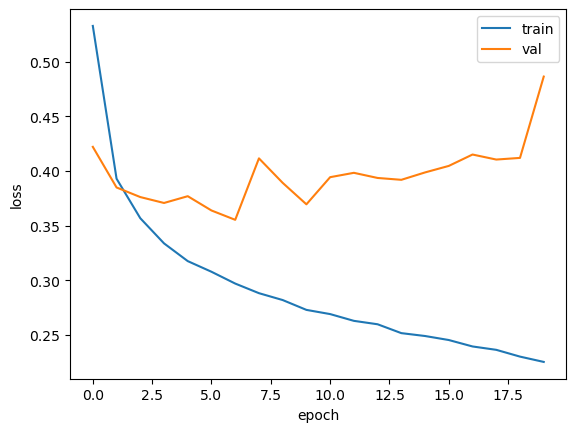

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

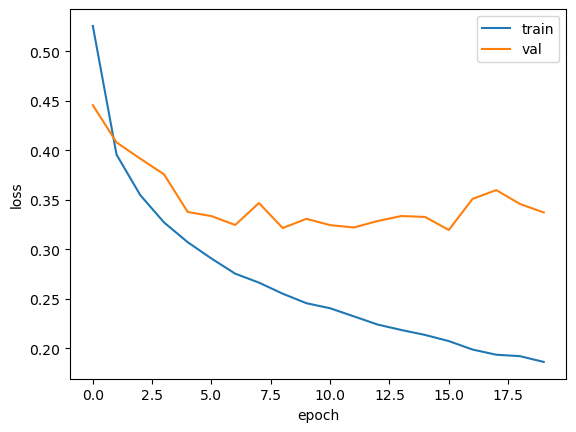

In [87]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [88]:
model = model_fn(keras.layers.Dropout(0.3))

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


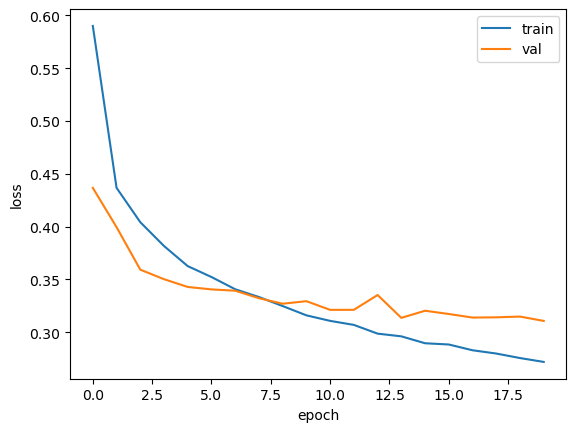

In [90]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [91]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [92]:
model.save_weights('model-weight.h5')

In [93]:
model.save('model-whole.h5')

C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
!ls -al *.h5

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [97]:
model = model_fn(keras.layers.Dropout(0.3))

In [98]:
model.load_weights('model-weight.h5')

In [99]:
import numpy as np

In [100]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

375/375 [==============================] - 0s 941us/step


In [101]:
val_labels.shape

(12000,)

In [102]:
val_target.shape

(12000,)

In [103]:
print(np.mean(val_labels == val_target))

0.8794166666666666


In [104]:
model = keras.models.load_model('model-whole.h5')

In [105]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3324 - accuracy: 0.8794


[0.3324257731437683, 0.8794166445732117]

In [106]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [107]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3158 - accuracy: 0.8862


[0.3157636225223541, 0.8861666917800903]

In [108]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [109]:
print(early_stopping_cb.stopped_epoch)

9


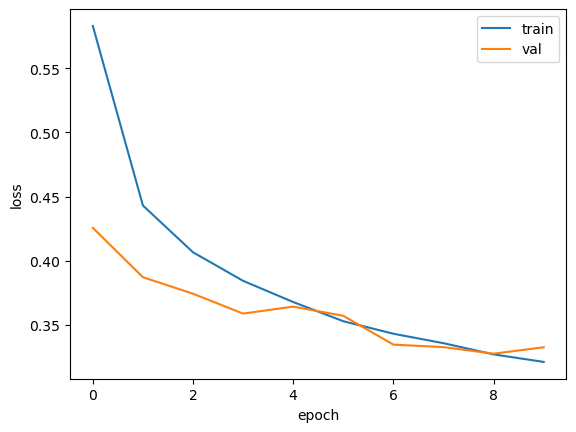

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [111]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3350 - accuracy: 0.8783


[0.3349536657333374, 0.878250002861023]

In [112]:
train_input, train_target, test_input, test_target

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [116]:
class_names = ['T-shirt/top','Tourser',
               'Pullover','Dress',
               'Coat','Sandal',
               'Shirts','Sneaker',
               'Bag','AnkleBoots',]

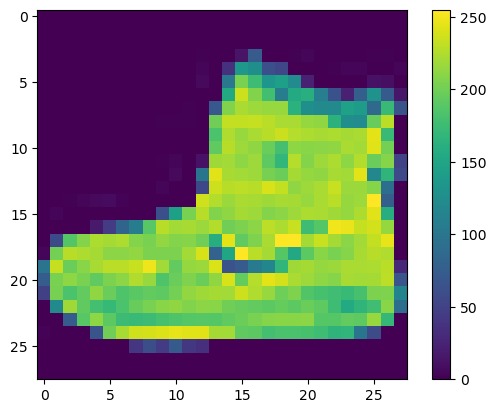

In [117]:
plt.figure()
plt.imshow(train_input[0])
plt.colorbar()
plt.grid(False)
plt.show()

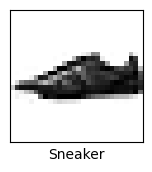

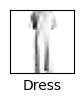

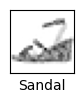

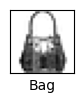

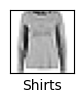

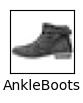

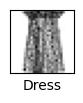

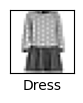

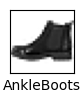

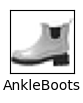

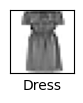

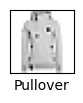

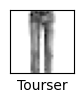

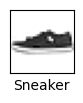

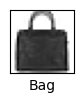

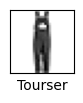

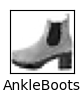

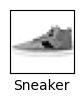

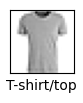

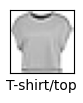

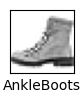

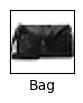

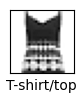

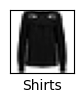

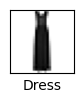

In [118]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_scaled[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_target[i]])
  plt.show()

In [119]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [120]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [121]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5218 - accuracy: 0.8156
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8595
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3499 - accuracy: 0.8721
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3249 - accuracy: 0.8823
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3030 - accuracy: 0.8878


In [122]:
test_loss, test_acc = model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8764


In [123]:
predictions = model.predict(val_scaled)

375/375 [==============================] - 0s 1ms/step


In [124]:
import numpy as np

In [125]:
def plot_image(i, predictions_array, true_lebel, img):
  predictions_array, true_lebel, img = predictions_array[i], true_lebel[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_lebel:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_lebel]),
                                       color=color)



In [126]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

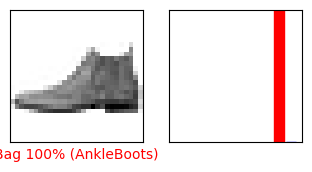

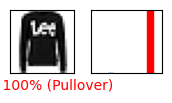

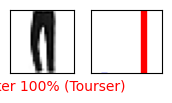

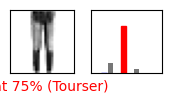

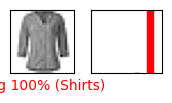

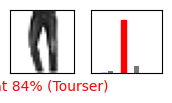

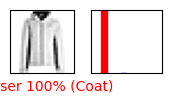

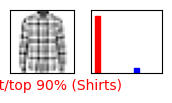

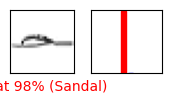

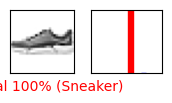

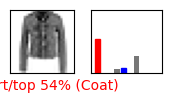

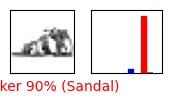

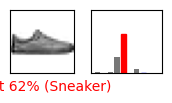

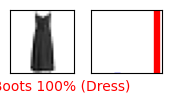

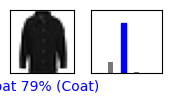

In [127]:
num_row = 5
num_cols = 3
num_images = num_row * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_row))
for i in range(num_images):
  plt.subplot(num_row, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_target, test_input)
  plt.subplot(num_row, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_target)
  plt.show()